# Data Science Programming1 -1

어제 이미 대충 들어봤기 때문에 정확히는 복습  <br>
어제는 진짜 예전에 내가 그랬던것처럼 그냥 배속으로 빠르게 듣기만 했는데, 이게 얼마나 잘못된 습관인지 깨달음... ㅠㅠ <br>
근데 강의 듣기전에 "이게 어떤 강의인지?"하고 전체적으로 탐색하고 그에 맞게 수강전략 세우는게 중요하다는 것도  <br>
어제 이미 실패할 거 다 실패했다. 앞으로 잘하자

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# California housing dataset 로드
housing = fetch_california_housing()

# 데이터를 Pandas 데이터프레임으로 변환
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# 데이터프레임의 처음 5개 샘플(head) 출력
print("Head of the dataset:")
print(df.head())

# 데이터프레임의 마지막 5개 샘플(tail) 출력
print("\nTail of the dataset:")
print(df.tail())

# 명령어 뭐의 줄임말인지 정리
#df.iloc[row_index, column_index]  "integer location 


Head of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Tail of the dataset:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3

# 히스토그램 그리기 

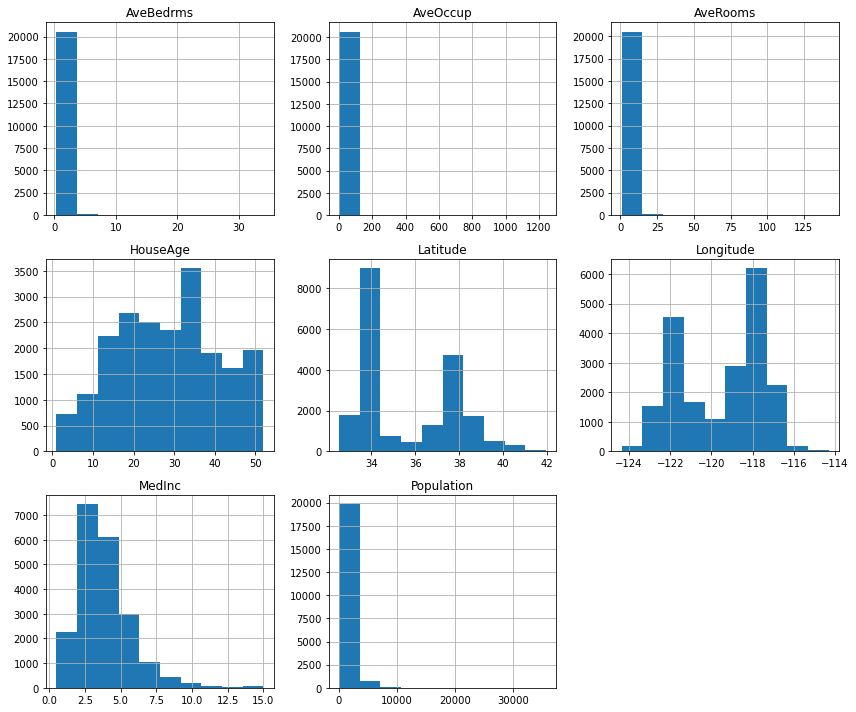

In [2]:
import matplotlib.pyplot as plt

# 데이터프레임의 히스토그램 그리기
df.hist(figsize=(12, 10))
plt.tight_layout() #자동으로 layout 최적화
plt.show()

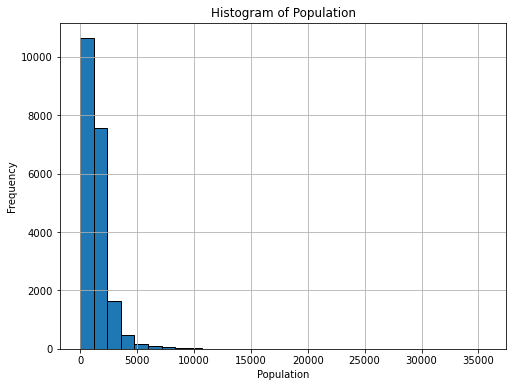

In [3]:
import matplotlib.pyplot as plt

# 'population' 열에 대한 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(df['Population'], bins=30, edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of Population')
plt.grid(True)
plt.show()


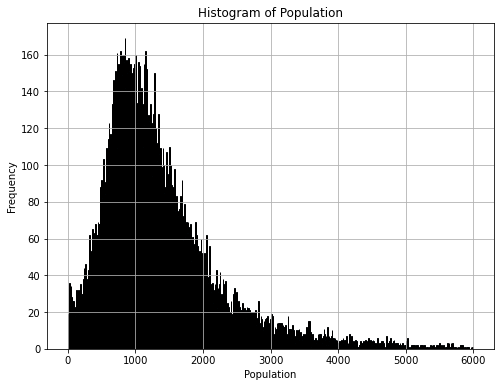

In [4]:
import matplotlib.pyplot as plt

# 'population' 열에 대한 히스토그램 그리기 (범위 0부터 10000까지, bin 개수 50개)
plt.figure(figsize=(8, 6))
plt.hist(df['Population'], bins=555, range=(0, 6000), edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of Population')
plt.grid(True)
plt.show()

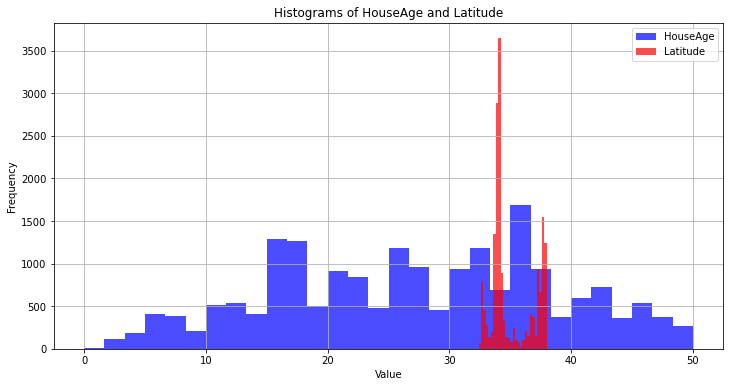

In [5]:
import matplotlib.pyplot as plt

# HouseAge와 Latitude에 대한 히스토그램 그리기
plt.figure(figsize=(12, 6))

# HouseAge 히스토그램 (파란색)
plt.hist(df['HouseAge'], bins=30, range=(0, 50), color='blue', alpha=0.7, label='HouseAge')

# Latitude 히스토그램 (빨간색)
plt.hist(df['Latitude'], bins=30, range=(32, 38), color='red', alpha=0.7, label='Latitude')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of HouseAge and Latitude')
plt.legend()
plt.grid(True)
plt.show()

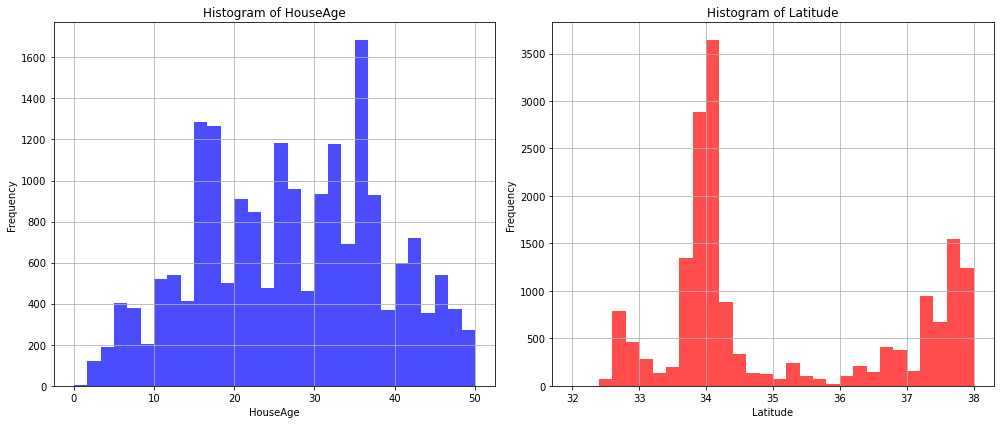

In [6]:
import matplotlib.pyplot as plt

# HouseAge와 Latitude에 대한 히스토그램 분리하여 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯 (HouseAge)
ax1.hist(df['HouseAge'], bins=30, range=(0, 50), color='blue', alpha=0.7)
ax1.set_xlabel('HouseAge')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of HouseAge')
ax1.grid(True)

# 두 번째 서브플롯 (Latitude)
ax2.hist(df['Latitude'], bins=30, range=(32, 38), color='red', alpha=0.7)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Latitude')
ax2.grid(True)

plt.tight_layout()
plt.show()

# BOX

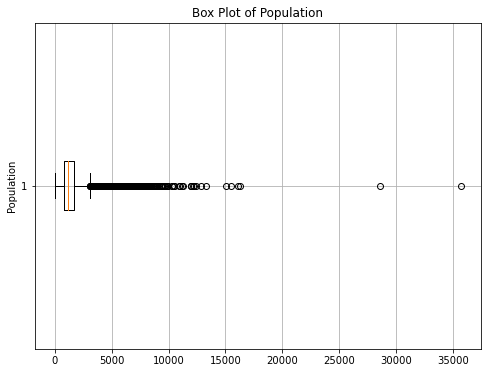

In [7]:
import matplotlib.pyplot as plt

# Population 열에 대한 박스 플롯 그리기 (수직 방향)
plt.figure(figsize=(8, 6))
plt.boxplot(df['Population'], vert=False)  # vert=True로 설정하여 수직 박스 플롯으로 그립니다
plt.ylabel('Population')
plt.title('Box Plot of Population')
plt.grid(True)
plt.show()


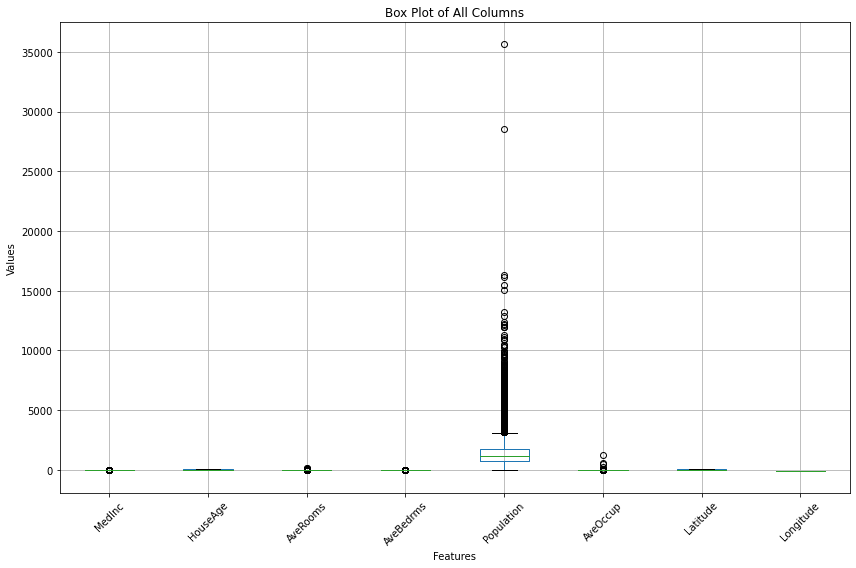

In [8]:
import matplotlib.pyplot as plt

# 모든 열에 대한 박스 플롯 그리기
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of All Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


# Mean and Variance

In [9]:
#평균공식
def calculate_mean(data):
    total_sum = 0
    num_elements = len(data)
    
    for value in data:
        total_sum += value
    
    if num_elements > 0:
        return total_sum / num_elements
    else:
        return None  # 데이터가 없을 경우 예외 처리

# 'Population' 열의 데이터 추출
population_data = df['Population']

# 사용자 정의 평균 함수로 평균 계산
empirical_mean = calculate_mean(population_data)

print(f"Empirical mean of Population (custom function): {empirical_mean}")

Empirical mean of Population (custom function): 1425.4767441860465


In [10]:
#분산1공식
def sample_variance_formula1(data):
    n = len(data)
    if n < 2:
        raise ValueError("Sample size must be greater than 1.")
    
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance

# 예시 데이터
data = [3, 5, 7, 9, 11]

# 함수 호출하여 표본 분산 계산
sample_var1 = sample_variance_formula1(data)
print(f"표본 분산 (공식 1): {sample_var1}")
#math.pow(3, -1))  # 3^(-1)

표본 분산 (공식 1): 8.0


In [11]:
#분산2공식
def sample_variance_formula2(data):
    n = len(data)
    if n < 2:
        raise ValueError("Sample size must be greater than 1.")
    
    mean = sum(data) / n
    variance = (sum(x ** 2 for x in data) - n * mean ** 2) / n
    return variance

# 예시 데이터
data = [3, 5, 7, 9, 11]

# 함수 호출하여 표본 분산 계산
sample_var2 = sample_variance_formula2(data)
print(f"표본 분산 (공식 2): {sample_var2}")

#이 2개 연산량 차이가 크게 없을 것 같다. 사실..

표본 분산 (공식 2): 8.0


Unbiased Estimator <br>
추정량의 기대값이 모수와 같아진다면 불편추정량 <br>
생플링에 따라서 u, s도 달라진다. #추정량은 공식, #추정치는 실제값<br>

헷갈리는거 찾아가면서 공부중인데...GPT나 인터넷 블로그나 이런데 진짜 잘못된 정보가 은근 많다 <br>
(항상 내가 틀렸을거라고 생각하지말자 가끔은 나를 믿자)  블로그나 GPT가 아니라 내가 맞을때도 있다. <br>
진짜 이것 때문에 시간을 얼마나 날린거야.... 앞으로 이런 실수하지말자<br>

왜 분산에 n이 아니라 n-1을 나눈지

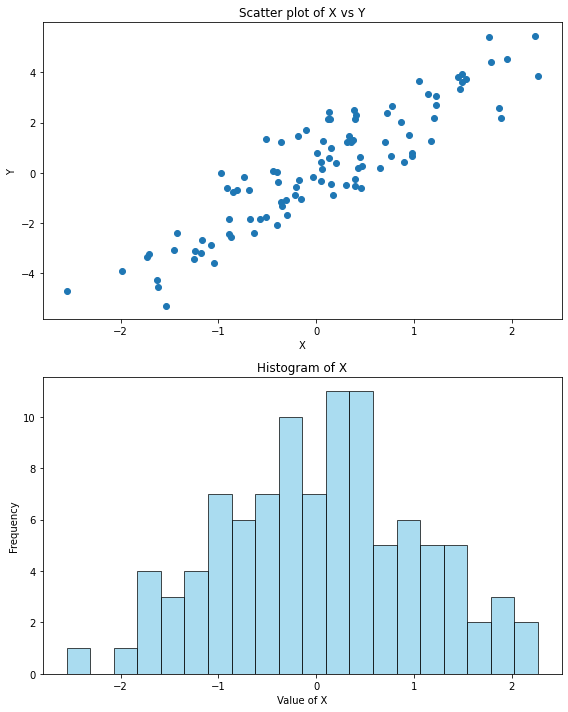

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
x = np.random.normal(size=100)  # 평균 0, 표준편차 1의 정규분포에서 100개의 샘플 생성
y = 2 * x + np.random.normal(size=100)  # y는 x에 비례하면서 추가적인 노이즈가 있는 데이터

# 산점도와 히스토그램을 subplot으로 그리기
fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # 2행 1열의 subplot 생성

# 첫 번째 subplot (산점도)
axs[0].scatter(x, y)
axs[0].set_title('Scatter plot of X vs Y')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# 두 번째 subplot (히스토그램)
axs[1].hist(x, bins=20, color='skyblue', alpha=0.7, edgecolor='black')  # x의 히스토그램 그리기
axs[1].set_title('Histogram of X')
axs[1].set_xlabel('Value of X')
axs[1].set_ylabel('Frequency')

plt.tight_layout()  # subplot 간의 간격 조정
plt.show()

In [13]:
# pivote talbe 사용예시

import pandas as pd

# 예시 데이터 생성
data = {
    'Date': ['2024-07-01', '2024-07-01', '2024-07-02', '2024-07-02', '2024-07-03'],
    'City': ['Seoul', 'Busan', 'Seoul', 'Busan', 'Seoul'],
    'Temperature': [25, 28, 27, 29, 26],
    'Humidity': [60, 55, 58, 53, 59]
}

df = pd.DataFrame(data)

print("원본 데이터프레임:")
print(df)
print()

# pivot_table을 사용하여 날짜별로 도시의 온도와 습도를 요약
pivot = pd.pivot_table(df, values=['Temperature', 'Humidity'], index='Date', columns='City')

print("Pivot Table 결과:")
print(pivot)


원본 데이터프레임:
         Date   City  Temperature  Humidity
0  2024-07-01  Seoul           25        60
1  2024-07-01  Busan           28        55
2  2024-07-02  Seoul           27        58
3  2024-07-02  Busan           29        53
4  2024-07-03  Seoul           26        59

Pivot Table 결과:
           Humidity       Temperature      
City          Busan Seoul       Busan Seoul
Date                                       
2024-07-01     55.0  60.0        28.0  25.0
2024-07-02     53.0  58.0        29.0  27.0
2024-07-03      NaN  59.0         NaN  26.0


In [14]:
import pandas as pd

# 예제 데이터 프레임 생성
df = pd.DataFrame({
    'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
    'B': ['one', 'one', 'two', 'two', 'one', 'one'],
    'C': [1, 2, 3, 4, 5, 6],
    'D': [2, 4, 6, 8, 10, 12]
})

# pivot_table을 사용하여 A와 B를 인덱스로, C와 D를 값으로 설정하고, aggfunc를 사용하여 합계를 계산
table = pd.pivot_table(df, values=['C', 'D'], index=['A', 'B'], aggfunc=np.sum)
print(table)


          C   D
A   B          
bar one  11  22
    two   4   8
foo one   3   6
    two   3   6


In [15]:
import pandas as pd

# 예제 데이터 프레임 생성
data = {
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C'],
    'value': [10, 20, 15, 25, 30, 35, 40, 45]
}

df = pd.DataFrame(data)
#print("Original DataFrame:")
#print(df)


# category 열에 대해 원핫인코딩 수행
#one_hot_encoded = pd.get_dummies(df['category'])
# 기존 데이터프레임과 합치기
#df_encoded = pd.concat([df, one_hot_encoded], axis=1)
#print("\nDataFrame after One-Hot Encoding:")
#print(df_encoded)

In [16]:
# 예제 데이터
data = {
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C'],
    'value': [10, 20, 15, 25, 30, 35, 40, 45]
}

# DataFrame을 생성하지 않고 리스트로 직접 원핫인코딩 구현
def one_hot_encoding(categories):
    # 중복되지 않은 범주들을 찾아서 정렬
    unique_categories = sorted(set(categories))
    # 결과를 담을 리스트 초기화
    encoded = []
    # 각 범주에 대해 원핫인코딩 수행
    for cat in categories:
        encoding = [0] * len(unique_categories)  # 초기화: 모든 요소를 0으로 설정
        encoding[unique_categories.index(cat)] = 1  # 해당 범주의 인덱스를 1로 설정
        encoded.append(encoding)
    return encoded

# category 열에 대해 원핫인코딩 수행
encoded_categories = one_hot_encoding(data['category'])

# 결과 출력
print("One-Hot Encoded Categories:")
for i, category in enumerate(data['category']):
    print(f"{category}: {encoded_categories[i]}")


One-Hot Encoded Categories:
A: [1, 0, 0]
B: [0, 1, 0]
A: [1, 0, 0]
C: [0, 0, 1]
B: [0, 1, 0]
C: [0, 0, 1]
A: [1, 0, 0]
C: [0, 0, 1]


# 임의로 데이터 생성하기

In [17]:
import random

# 데이터 수
num_data = 8

# 가능한 지역 리스트
regions = ['서울', '중부', '남부']

# 데이터 생성 함수
def generate_data(num_data):
    data = []
    for _ in range(num_data):
        name = f"랜덤{random.randint(10, 100)}"  # 랜덤 이름 생성
        region = random.choice(regions)  # 랜덤 지역 선택
        salary = random.randint(1000, 5000)  # 랜덤 연봉 생성
        data.append((name, region, salary))
       # print(data)
    return data

# 데이터 생성
salary_data = generate_data(num_data)

# 결과 출력
print("이름\t\t지역\t\t연봉")
print("-" * 30)
for name, region, salary in salary_data:
    print(f"{name}\t\t{region}\t\t{salary}")


이름		지역		연봉
------------------------------
랜덤50		남부		3725
랜덤37		남부		1307
랜덤91		중부		2426
랜덤41		중부		4085
랜덤46		서울		2063
랜덤12		중부		2654
랜덤39		서울		4949
랜덤48		서울		4356


In [18]:
import pandas as pd

def create_encoded_dataframe(data):
    encoded_data = []
    for name, region, salary in data:
        if region == "중부":
            encoded_region = (0, 1)
        elif region == "남부":
            encoded_region = (1, 1)
        elif region == "서울":
            encoded_region = (0, 0)
        else:
            raise ValueError(f"Unexpected region: {region}")
        
        encoded_data.append((name, encoded_region, salary))
    
    df = pd.DataFrame(encoded_data, columns=["이름", "지역", "연봉"])
    return df

# 주어진 데이터
data = [
    ("랜덤44", "중부", 2006),
    ("랜덤80", "중부", 1405),
    ("랜덤66", "남부", 2813),
    ("랜덤36", "남부", 4567),
    ("랜덤78", "서울", 1900),
    ("랜덤44", "중부", 1549),
    ("랜덤22", "서울", 1814),
    ("랜덤33", "중부", 3726)
]

# 함수 호출하여 데이터프레임 생성
encoded_df = create_encoded_dataframe(data)
print(encoded_df)


     이름      지역    연봉
0  랜덤44  (0, 1)  2006
1  랜덤80  (0, 1)  1405
2  랜덤66  (1, 1)  2813
3  랜덤36  (1, 1)  4567
4  랜덤78  (0, 0)  1900
5  랜덤44  (0, 1)  1549
6  랜덤22  (0, 0)  1814
7  랜덤33  (0, 1)  3726


table = pd.pivot_table(df, values=['C', 'D'], index=['A', 'B'], aggfunc=np.sum)
연산량이 너무 많다.
시행착오,

어제랑 오늘이 뭐가 다른지 생각하고
실수한 것 반성하고 나아가자,
효율적으로 공부하는 방법에 대해서 생각하자